In [423]:
import pandas as pd

In [424]:
data=pd.read_csv('train.csv')

In [425]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [426]:
import matplotlib.pyplot as plt
import seaborn as sns

In [427]:
sns.set()

In [428]:
font={
    'size':18
}

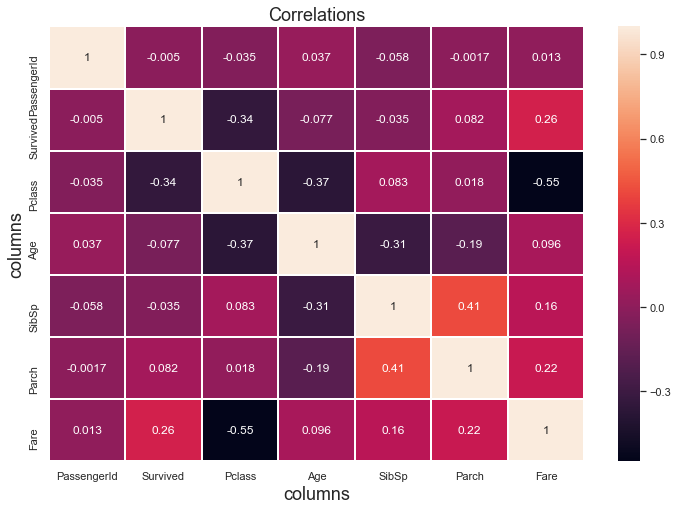

In [429]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True,linewidths=1,linecolor='w')
plt.xlabel('columns', fontdict=font)
plt.ylabel('columns', fontdict=font)
plt.xticks(rotation=0)
plt.title('Correlations', fontdict=font)
plt.savefig('1.png')

In [430]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [431]:
test=data['Sex'].value_counts()

In [432]:
test=pd.Series(test)

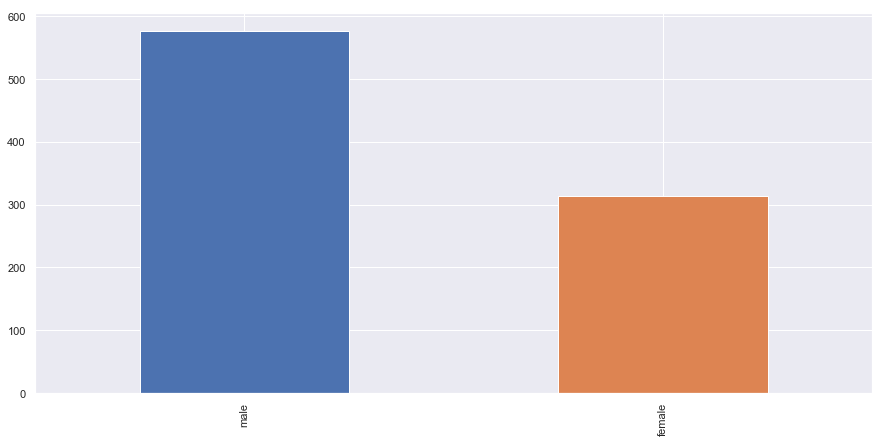

In [433]:
sns.set(rc={'figure.figsize':(15, 7)})
test.plot(kind='bar')
plt.savefig('male.png')

In [434]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [435]:
data.Sex[data.Sex == 'male'] = 1
data.Sex[data.Sex == 'female'] =0

C:\Users\Priyanka\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Priyanka\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [436]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [437]:
data1=data.groupby('Sex')['Survived'].value_counts()

In [438]:
data1


Sex    Survived
0      1           233
       0            81
1      0           468
       1           109
total              891
Name: Survived, dtype: int64

In [439]:
data1['total']=data1.sum()

In [440]:
data1

Sex    Survived
0      1            233
       0             81
1      0            468
       1            109
total              1782
Name: Survived, dtype: int64

In [441]:
survived_data = pd.DataFrame()

In [442]:
survived_data


""


In [443]:
female_survival=data1[0][1]
male_survival=data1[1][1]
female_unsurvival=data1[0][0]
male_unsurvival=data1[1][0]

In [444]:
survived_data['Sex'] = ['male', 'female']
survived_data['Survived'] = [male_survival, female_survival]
survived_data['unSurvived'] = [male_unsurvival, female_unsurvival]


In [445]:
survived_data

,Sex,Survived,unSurvived
0,male,109,468
1,female,233,81


In [449]:
survived_data=survived_data.set_index('Sex')

(array([0, 1]), <a list of 2 Text xticklabel objects>)

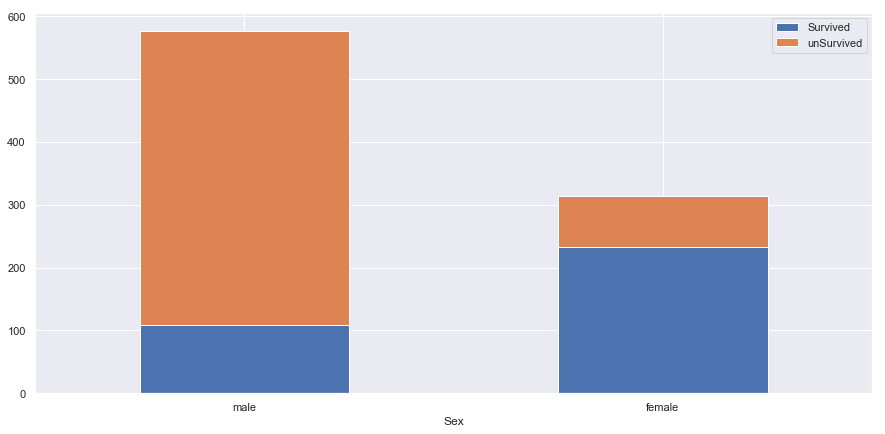

In [450]:
sns.set(rc={'figure.figsize':(15, 7)})
survived_data.plot(kind='bar',stacked=True)
plt.savefig('comparision.png')
plt.xticks(rotation=0)


In [451]:
survived_data



,Survived,unSurvived
Sex,,
male,109,468
female,233,81


In [452]:
test

male      577
female    314
Name: Sex, dtype: int64

In [453]:
survived_data['total']=[test['male'],test['female']]

In [454]:
survived_data

,Survived,unSurvived,total
Sex,,,
male,109,468,577
female,233,81,314


In [455]:
new_data = survived_data.apply(lambda x: round(100 * x/survived_data['total']))

In [460]:
new_data

,Survived,unSurvived,total
Sex,,,
male,19.0,81.0,100.0
female,74.0,26.0,100.0


In [462]:
new_data.drop('total',axis=1,inplace=True)

In [463]:
new_data

,Survived,unSurvived
Sex,,
male,19.0,81.0
female,74.0,26.0


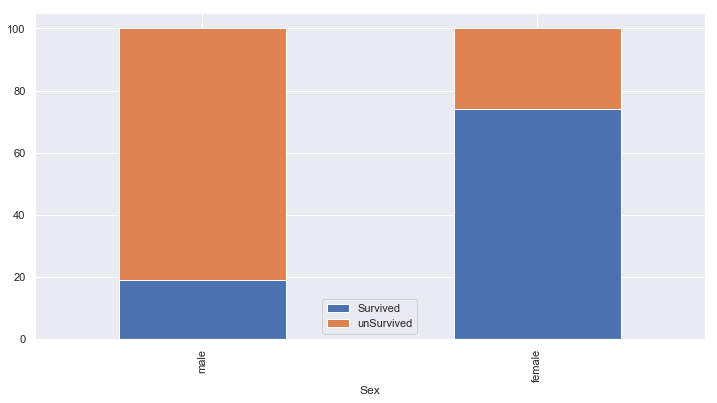

In [465]:
sns.set(rc={'figure.figsize':(12,6)})
new_data.plot(kind='bar',stacked=True)
plt.savefig('stacked100%_bar_chart.png')

In [467]:
ag=pd.crosstab(data['Sex'], data['Survived'])

(array([0, 1]), <a list of 2 Text xticklabel objects>)

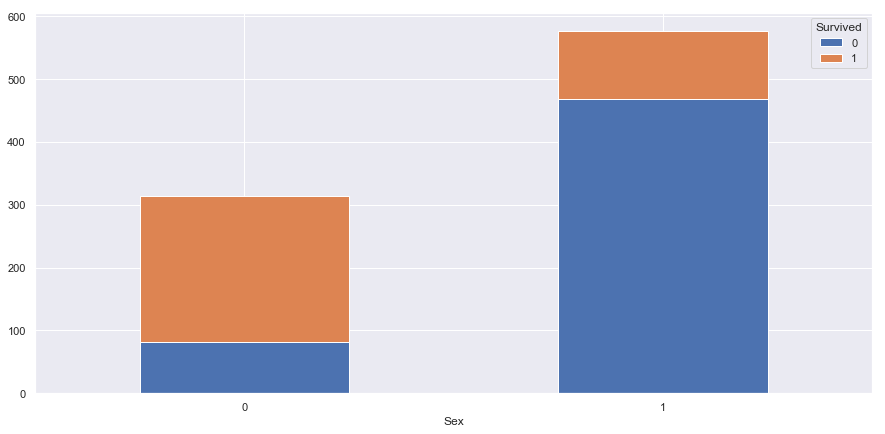

In [468]:
sns.set(rc={'figure.figsize':(15, 7)})
ag.plot(kind='bar',stacked=True)
plt.savefig('comparision1.png')
plt.xticks(rotation=0)
